In [6]:
#import important libraries for handling the dataset, random forest classifier and plotting
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
#add the train and test sets into dataframes 
train_df = pd.read_csv('train_data_resampled_v2.csv')
test_df = pd.read_csv('test_data_v2.csv')

#seperate training and testing sets 
x_train = train_df.drop('Class', axis=1)
y_train = train_df['Class']

x_test = test_df.drop('Class', axis=1)
y_test = test_df['Class']


In [ ]:
#intitaliaze random forest classifier 
rfc = RandomForestClassifier(random_state=42, n_jobs=6)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

              precision    recall  f1-score   support

Not Fraud(0)       1.00      1.00      1.00     56864
    Fraud(1)       0.83      0.85      0.84        98

    accuracy                           1.00     56962
   macro avg       0.91      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



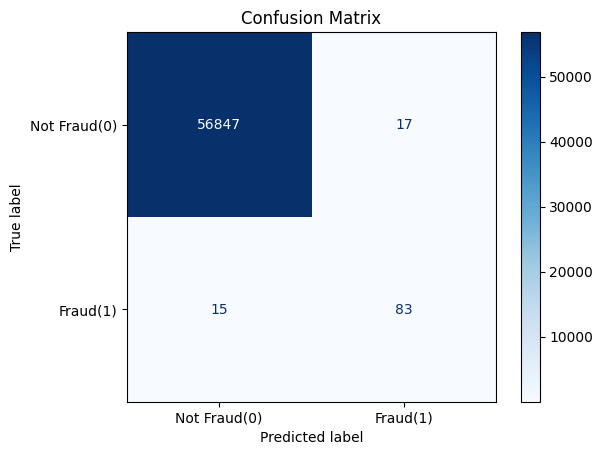

In [ ]:
#display results non graphically 
report = classification_report(y_test, y_pred, target_names=['Not Fraud(0)', 'Fraud(1)'])
print(report)

#visualize results using confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud(0)', 'Fraud(1)'])

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#import grid search package
from sklearn.model_selection import GridSearchCV

#define parameters for grid search 
param_grid = {
    'n_estimators': [100, 200],         #number of trees in the forest
    'max_depth': [10, 30, None],        #maximum depth of the tree 'None' means no limit.
    'min_samples_split': [2, 5],        #minimum number of samples required to split a node
    'min_samples_leaf': [1, 4]          #minimum number of samples required at a leaf node
}

#intialize random forest classifier grid search
rfc_grid = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rfc_grid,
    param_grid=param_grid,
    scoring='recall',
    cv=3,
    n_jobs=-1  
)

grid_search.fit(x_train, y_train) 


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 30, None],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='recall')

Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
               precision    recall  f1-score   support

Not Fraud (0)       1.00      1.00      1.00     56864
    Fraud (1)       0.81      0.85      0.83        98

     accuracy                           1.00     56962
    macro avg       0.91      0.92      0.91     56962
 weighted avg       1.00      1.00      1.00     56962



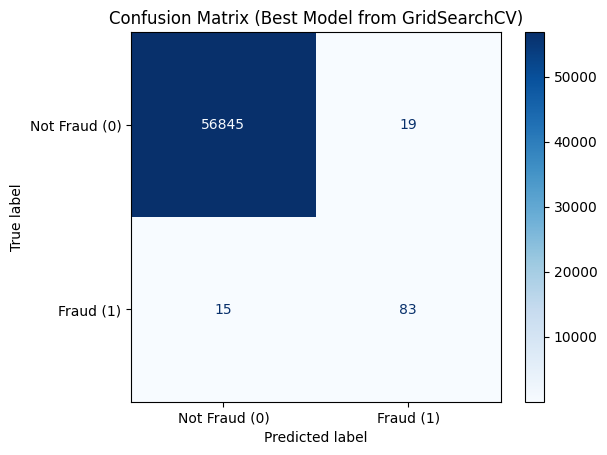

In [ ]:
#print the best parameters 
print("Best parameters found: ", grid_search.best_params_)

#best model is then used to make predictions
y_pred_best = grid_search.predict(x_test)

#final results are displayed
print(classification_report(y_test, y_pred_best, target_names=['Not Fraud (0)', 'Fraud (1)']))

#fina lresults are visualized using confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud (0)', 'Fraud (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Best Model from GridSearchCV)")
plt.show()

In [3]:
#xgboost classifier is imported 
from xgboost import XGBClassifier

#xgboost model is initialized 
xgb = XGBClassifier(random_state = 42)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)


               precision    recall  f1-score   support

Not Fraud (0)       1.00      1.00      1.00     56864
    Fraud (1)       0.70      0.87      0.78        98

     accuracy                           1.00     56962
    macro avg       0.85      0.93      0.89     56962
 weighted avg       1.00      1.00      1.00     56962



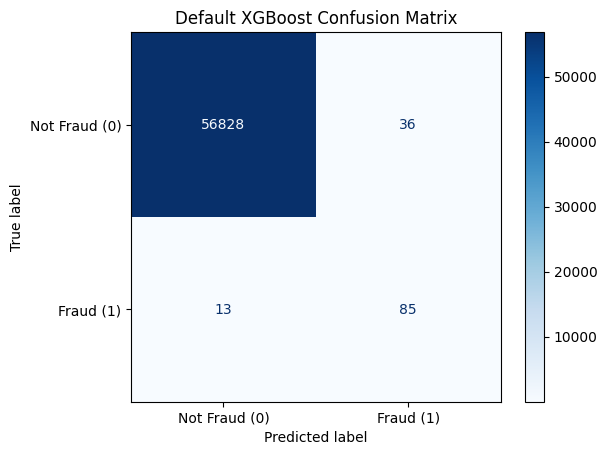

In [4]:
#results are dislpayed 
print(classification_report(y_test, y_pred_xgb, target_names=['Not Fraud (0)', 'Fraud (1)']))

#results are visuialized using confusion matrix 
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Not Fraud (0)', 'Fraud (1)'])
disp_xgb.plot(cmap=plt.cm.Blues)
plt.title("Default XGBoost Confusion Matrix")
plt.show()

In [7]:
#parameters for grid search are defined 
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

#grid search xgb model is initialized 
xgb_grid = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

grid_search_xgb = GridSearchCV(
    estimator=xgb_grid,
    param_grid=xgb_param_grid,
    scoring='recall',
    cv=3,
    n_jobs=-1
)

grid_search_xgb.fit(x_train, y_train) 

c:\Users\Nidou\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:12:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 1.0],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.7, 1.0]},
             scoring='recall')

Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
               precision    recall  f1-score   support

Not Fraud (0)       1.00      1.00      1.00     56864
    Fraud (1)       0.77      0.87      0.81        98

     accuracy                           1.00     56962
    macro avg       0.88      0.93      0.91     56962
 weighted avg       1.00      1.00      1.00     56962



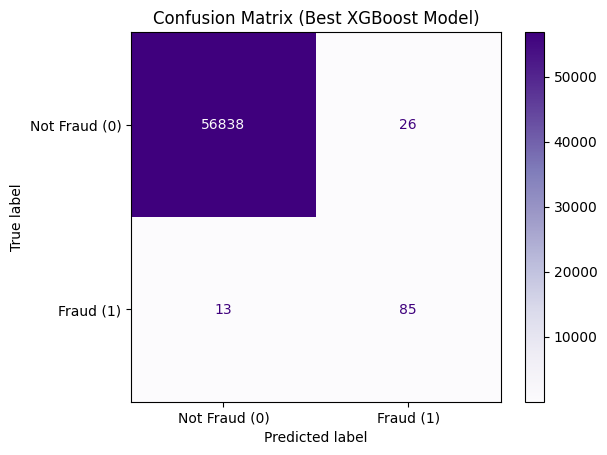

In [9]:
#best model is used to make predictions
print("Best parameters found: ", grid_search_xgb.best_params_)
best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(x_test)

#final results is displayed
print(classification_report(y_test, y_pred_best_xgb, target_names=['Not Fraud (0)', 'Fraud (1)']))

#final results are visualized using confusion martix
cm_xgb = confusion_matrix(y_test, y_pred_best_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Not Fraud (0)', 'Fraud (1)'])
disp_xgb.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix (Best XGBoost Model)")
plt.show()

In [ ]:
#decision tree classifier is imported
from sklearn.tree import DecisionTreeClassifier

#decision tree calssifier is intialized
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train)

y_pred_dtc = dtc.predict(x_test)

               precision    recall  f1-score   support

Not Fraud (0)       1.00      1.00      1.00     56864
    Fraud (1)       0.38      0.80      0.51        98

     accuracy                           1.00     56962
    macro avg       0.69      0.90      0.76     56962
 weighted avg       1.00      1.00      1.00     56962



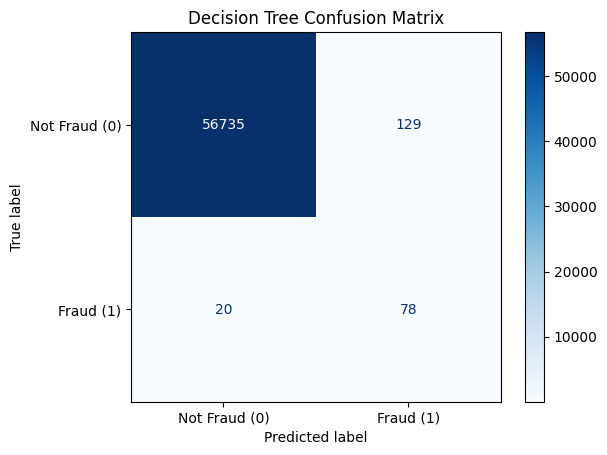

In [ ]:
#resultsa are displayed 
print(classification_report(y_test, y_pred_dtc, target_names=['Not Fraud (0)', 'Fraud (1)']))

#results are visualized using confusion matrix
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
disp_dtc = ConfusionMatrixDisplay(confusion_matrix=cm_dtc, display_labels=['Not Fraud (0)', 'Fraud (1)'])
disp_dtc.plot(cmap=plt.cm.Blues) 
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [ ]:
#defining decision tree classififer grid search parameters
dt_param_grid = {
    'criterion': ['gini', 'entropy'],    #impurity measure to decide the splitting criterion
    'max_depth': [5, 10, 20, None],      #'None' means no limit
    'min_samples_split': [2, 5, 10],     
    'min_samples_leaf': [1, 5, 10]
}

#decuision tree grid search intialized
dtc_grid = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(
    estimator=dtc_grid,
    param_grid=dt_param_grid,
    scoring='recall',
    cv=3,
    n_jobs=-1
)

grid_search_dt.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
               precision    recall  f1-score   support

Not Fraud (0)       1.00      1.00      1.00     56864
    Fraud (1)       0.38      0.81      0.51        98

     accuracy                           1.00     56962
    macro avg       0.69      0.90      0.76     56962
 weighted avg       1.00      1.00      1.00     56962



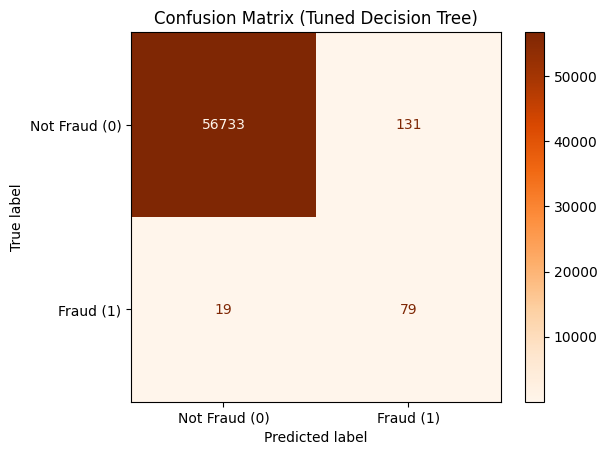

In [12]:
# best model is used to make predictions 
print("Best parameters found: ", grid_search_dt.best_params_)
best_dtc = grid_search_dt.best_estimator_
y_pred_best_dt = best_dtc.predict(x_test)

#final results are displayed
print(classification_report(y_test, y_pred_best_dt, target_names=['Not Fraud (0)', 'Fraud (1)']))

#final results are visualized using a confusion matrix

cm_best_dt = confusion_matrix(y_test, y_pred_best_dt)
disp_best_dt = ConfusionMatrixDisplay(confusion_matrix=cm_best_dt, display_labels=['Not Fraud (0)', 'Fraud (1)'])
disp_best_dt.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix (Tuned Decision Tree)")
plt.show()
